> **TODO**

**Try to Predict for Another Task**

Now, your are familiar with the simple pipeline of data mining. The final task for you is to explore the ```data/dataset.xlsx``` to predict one of the labels above:
* ```patient_addmited_to_regular_ward_(1=yes,_0=no)```
* ```patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)```
* ```patient_addmited_to_intensive_care_unit_(1=yes,_0=no)```

> Requirements
* Use **Row 5001-5645** of ```data/dataset.xlsx``` as the Test Split. Write code or a jupyter notebook to show how you solve this task. Please give detailed comments of your code and a good demonstration of your results.

In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Take a glance at the provided data 

raw_data = pd.read_excel('data/dataset.xlsx', engine="openpyxl")

raw_data.info()
raw_data.describe()
raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Fill in missing features

raw_data.columns = [x.lower().strip().replace(' ','_') for x in raw_data.columns]

for x in raw_data.columns:
    if raw_data[x].dtype=='float16' or  raw_data[x].dtype=='float32' or  raw_data[x].dtype=='float64':
        # raw_data[x].fillna(raw_data[x].mean())
        raw_data[x].fillna(raw_data[x].mean(skipna=True), inplace=True)

raw_data = raw_data.fillna(-999)

# Convert label-typed features
for y in raw_data.columns:
    if raw_data[y].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(raw_data[y].values))
        raw_data[y] = lbl.transform(list(raw_data[y].values))

raw_data.head(3)

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,1588,13,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
1,451,17,0,0,0,0,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
2,3669,8,0,0,0,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09


In [5]:
# data preprocess

not_X_cols = ['patient_id','sars-cov-2_exam_result', 'patient_addmited_to_regular_ward_(1=yes,_0=no)', 'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)', 'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']
y_cols = ['patient_addmited_to_regular_ward_(1=yes,_0=no)']
X_cols = [x for x in raw_data.columns if x not in not_X_cols] # These columns are the features we can use to predict
X = raw_data[X_cols]
# Y_cols
y = raw_data[y_cols] 
# np.sum(Y.to_numpy(), axis=0)

In [6]:
# feature engineering(for X)

# from sklearn.preprocessing import 
X.head()

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,13,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
1,17,2.365154e-01,-2.234027e-02,-5.174130e-01,1.067657e-02,1.020042e-01,3.183658e-01,-9.507903e-01,-9.461035e-02,-2.237665e-01,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
2,8,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
3,5,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
4,15,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09


In [9]:
# split dataset

X_train = X[0: 5000]
X_test = X[5000:-1]
y_train = y[0: 5000]
y_test = y[5000:-1]

In [ ]:
# view train data

v_num = 1000
pos_slice = (y_train[0:v_num]==1).to_numpy()
neg_slice = (y_train[0:v_num]==0).to_numpy()
for i in np.arange(0, X_train.shape[1], 2):
    pos_x = X_train[0:v_num][pos_slice].to_numpy()[:, i: i + 2]
    neg_x = X_train[0:v_num][neg_slice].to_numpy()[:, i: i + 2]
    plt.figure(figsize=(6,6))
    plt.scatter(pos_x[:,0], pos_x[:,1],marker='+', c='red')
    plt.scatter(neg_x[:,0], neg_x[:,1],marker='o', s = 2, c='lime')
    plt.xlabel(f'feature{i}')
    plt.ylabel(f'feature{i+1}')
    plt.savefig(f'figures/scatter/feature{i}and{i+1}.png')
    plt.show()

In [27]:
pos_slice = (y_train[0:1000] == 1).to_numpy()
X_train[0:1000][pos_slice]

,patient_age_quantile,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,...,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
30,9,-6.790275e-01,-7.115558e-01,9.523187e-01,-8.868694e-01,-3.211240e-01,-8.757005e-01,-2.537424e-01,-2.866230e-01,-2.237665e-01,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
69,17,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
111,10,5.798440e-01,8.548439e-01,-6.681547e-01,-4.380969e-01,8.424793e-01,-3.810160e-01,1.140354e+00,-6.595170e-01,8.169255e-02,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
112,16,3.051793e-02,-8.499590e-02,-2.033678e-01,-9.990631e-01,2.959383e-01,-8.927587e-01,-4.528995e-01,8.352920e-03,8.169255e-02,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
127,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
284,16,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
655,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
883,18,4.882894e-01,2.282840e-01,8.555385e-02,-7.746768e-01,7.543272e-01,2.024174e+00,-8.512099e-01,-6.929105e-01,8.169255e-02,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
884,15,-4.959191e-01,-3.982758e-01,-7.184020e-01,-4.380969e-01,-5.679496e-01,-9.354039e-01,2.441486e-01,-8.209189e-01,-1.140144e+00,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
979,0,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633739e-09,...,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09


In [55]:
# evaluate the model

from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_curve, auc, make_scorer
from sklearn.model_selection import cross_val_score

def my_scoring(y_true, y_pred):
    # 正确率在0.9范围上寻找最高f1-score
    acc = sum(y_pred == y_true)/len(y_pred)
    ans = 0
    if acc > 0.9:
        ans = f1_score(y_true, y_pred)
    print('ans:'+str(ans))
    return ans

def cross_f1_score(model, X, y):
    sc = cross_val_score(model, X, y, scoring=make_scorer(my_scoring, greater_is_better=True))
    sc = sc.mean()
    print('sc:'+ str(sc))
    return sc

def tune_param(est, params):
    max_sc = 0
    best_param = {}
    for param in params:
        model = est(**param)
        sc = cross_f1_score(model, X_train, y_train)
        if sc > max_sc:
            max_sc = sc
            best_param = param
    return best_param, max_sc

def evaluate_model(model, name, print_or_not:bool = True, need_fit = False):
    performance = {}
    
    # cv_acc = 0
    if name == 'K Nearest Neighbors' or name == 'Random Forest' or 'Decision Tree' or need_fit:
        model.fit(X_train, y_train)
        # print(cv_acc)
        # cv_acc = cv_acc.mean()
        # performance['cv_accuracy'] = cv_acc
    prds = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, prds)
    performance['accuracy'] = accuracy
    
    conf_mat = confusion_matrix(y_test, prds)
    performance['confusion_matrix'] = conf_mat
    
    precision_sc = precision_score(y_test, prds)
    performance['precision_score'] = precision_sc
    
    recall_sc = recall_score(y_test, prds)
    performance['recall_score'] = recall_sc
    
    f1_sc = f1_score(y_test, prds)
    performance['f1_score'] = f1_sc
    
    if print_or_not == True:
        print(f'evaluation of {name}:')
        # print(f'Cross Validation\'s Accuracy of {name}: {cv_acc}')
        
        print(f'Accuracy of {name}: {accuracy}')
        print(f'Confussion Matrix of {name}:\n{conf_mat}')
        print(f"Precision score of {name}: {precision_sc}")
        print(f"Recall score of {name}: {recall_sc}")
        print(f"F1 score of {name}: {f1_sc}")
    
        if name != "Support Vector Machine":
            y_score = model.predict_proba(X_test)[:, 1]
            fpr, tpr, threshold = roc_curve(y_test, y_score)
            roc_auc = auc(fpr, tpr)
            plt.figure(figsize=(6,6))
            plt.title('Validation ROC')
            plt.plot(fpr, tpr, 'b', label = 'Val AUC = %0.3f' % roc_auc)
            plt.legend(loc = 'lower right')
            plt.plot([0, 1], [0, 1],'r--')
            plt.xlim([0, 1])
            plt.ylim([0, 1])
            plt.ylabel('True Positive Rate')
            plt.xlabel('False Positive Rate')
            plt.show()
            
    return performance


evaluation of Logistic Regression:
Accuracy of Logistic Regression: 0.9144634525660964
Confussion Matrix of Logistic Regression:
[[567  47]
 [  8  21]]
Precision score of Logistic Regression: 0.3088235294117647
Recall score of Logistic Regression: 0.7241379310344828
F1 score of Logistic Regression: 0.43298969072164945


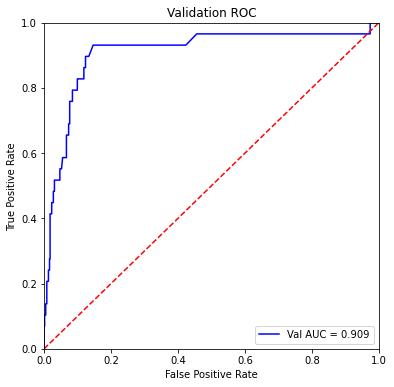

In [34]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(penalty='l2', C=1, class_weight={0:1, 1:80})

pf = evaluate_model(LR_model, "Logistic Regression")

In [1]:
# 调整参数
params = []
for i in np.arange(10,100,10):
    params.append({'class_weight': {1:i, 0:1}})
print(f'params:{params}')
param_sel, score = tune_param(LogisticRegression, params)
# LR_md = LogisticRegression(**params[0])
# print(my_scoring(y_pred))
# print(f'selected param:{param_sel} best score:{score}')
# evaluate_model(tree, "Decision Tree")

NameError: name 'np' is not defined

In [131]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight='balanced')
# DT_model = DecisionTreeClassifier(class_weight='balanced')

pf = evaluate_model(DT_model, 'Decision Tree')

evaluation of Decision Tree:
Accuracy of Decision Tree: 0.8989113530326595
Confussion Matrix of Decision Tree:
[[563  10   1   5]
 [ 19   7   1   2]
 [  8   2   2   3]
 [  7   3   4   6]]
Precision score of Decision Tree: 0.8989113530326595
Recall score of Decision Tree: 0.8989113530326595
F1 score of Decision Tree: 0.8989113530326595
